Q3 Python Housing 

Reference: https://www.geeksforgeeks.org/combine-two-pandas-series-into-a-dataframe/
https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.reset_index.html

In [1]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np #np is the standard convention for Numpy
import random

In [2]:
#Step 2. Create 3 differents Series, each of length 100, as follows:
#• The first a random number from 1 to 4
#• The second a random number from 1 to 3
#• The third a random number from 10,000 to 30,000

A = pd.Series(np.random.randint(1,5,100))
B = pd.Series(np.random.randint(1,4,100))
C = pd.Series(np.random.randint(10000,30000,100))

In [3]:
#Step 3. Create a DataFrame by joinning the Series by column
#Concatenate-combine series
df = pd.concat([A,B,C],axis=1)
df

,0,1,2
0,3,3,12863
1,3,1,21699
2,3,3,24267
3,2,3,27582
4,1,1,18852
...,...,...,...
95,3,1,14341
96,3,1,18891
97,3,2,20107
98,3,3,20988


In [4]:
#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
df.columns = ['bedrs','bathrs','price_sqr_meter']
df

,bedrs,bathrs,price_sqr_meter
0,3,3,12863
1,3,1,21699
2,3,3,24267
3,2,3,27582
4,1,1,18852
...,...,...,...
95,3,1,14341
96,3,1,18891
97,3,2,20107
98,3,3,20988


In [5]:
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([A,B,C],axis=0)
bigcolumn

0         3
1         3
2         3
3         2
4         1
      ...  
95    14341
96    18891
97    20107
98    20988
99    15537
Length: 300, dtype: int32

In [6]:
#Step 6. Ops it seems it is going only until index 99. Is it true?
len(bigcolumn)
#The length is 300, but index is 99.

300

In [7]:
#Step 7. Reindex the DataFrame so it goes from 0 to 299
#index range(0,300)

bigcolumn.reset_index(drop=True,inplace=True)
bigcolumn

0          3
1          3
2          3
3          2
4          1
       ...  
295    14341
296    18891
297    20107
298    20988
299    15537
Length: 300, dtype: int32

Q4 Python Wind Statistics

Reference:https://stackoverflow.com/questions/37766353/pandas-to-datetime-parsing-wrong-year

In [8]:
#Step 1. Import the necessary libraries
import pandas as pd
import datetime

In [9]:
#Step 2. Import the dataset from this address
#Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
data_url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data'
data = pd.read_csv(data_url, sep = "\s+", parse_dates = [[0,1,2]]) 
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [10]:
#Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it
#1.Find the max &min in date
data['Yr_Mo_Dy'].max()

Timestamp('2069-12-31 00:00:00')

In [11]:
data['Yr_Mo_Dy'].min()

Timestamp('1970-01-01 00:00:00')

In [12]:
def fix_date(x):
    if x.year > 1989:
        year = x.year - 100
    else:
        year = x.year
    return datetime.date(year,x.month,x.day)

In [13]:
#Apply to function
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_date)
#Call data
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [14]:
#Check again
data.Yr_Mo_Dy.max()

datetime.date(1978, 12, 31)

In [15]:
#Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
data['Yr_Mo_Dy'] = pd.to_datetime(data['Yr_Mo_Dy']) #transform date to datetime64
data = data.set_index('Yr_Mo_Dy')  #set index
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [16]:
#Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [17]:
#Step 7. Compute how many non-missing values there are in total.
#find the not null value
data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [18]:
#Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
#A single number for the entire dataset.
#Fill in all NaN to 0 and calculate mean
data.fillna(0).values.flatten().mean()

10.223864592840483

In [19]:
#Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
#A different set of numbers for each location.
loc_stats = data.describe()
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,8.000000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.710000,10.710000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
75%,15.920000,14.040000,14.670000,8.420000,13.540000,9.670000,12.960000,11.420000,11.190000,11.630000,16.880000,19.830000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [20]:
#Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
#A different set of numbers for each day.

#create dataframe
data_stats = pd.DataFrame()
data_stats['min'] = data.min(axis=1)
data_stats['max'] = data.max(axis=1)
data_stats['mean'] = data.mean(axis=1)
data_stats['std'] = data.std(axis=1)
data_stats.head()  #call dataframe by head

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [21]:
#Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.
data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [22]:
#Step 12. Downsample the record to a yearly frequency for each location.
data.groupby(data.index.to_period('A')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [23]:
#Step 13. Downsample the record to a monthly frequency for each location.
data.groupby(data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [24]:
#Step 14. Downsample the record to a weekly frequency for each location.
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [25]:
#Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.
weekly = data.resample('W').agg(['min','max','mean','std'])
weekly.loc[weekly.index[1:53], "RPT":"MAL"] .head(5) ## slice it for the first 52 weeks and locations

RPT                               VAL                    \
              min    max       mean       std   min    max       mean   
Yr_Mo_Dy                                                                
1961-01-08  10.58  18.50  13.541429  2.631321  6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392  3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402  3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061  9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408  9.46  24.21  15.460000   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Yr_Mo_Dy                            ...                                      
1961-01-08  3.949525   7.62  12.33  ...   8.497143  1.704941   5.46  17.54   
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  3.837785   7.29  20.79  ...   8.124286  4.783952   6.50  15.92   
1961-01-29  5.170224  12.67  25.84  ...  15.640000  3.713368  14.04  27.71   
1961-02-05  5.187395   9.04  19.70  ...   9.460000  2.839501   9.17  19.33   

                                   MAL                              
                 mean       std    min    max       mean       std  
Yr_Mo_Dy                                                            
1961-01-08  12.481429  4.349139  10.88  16.46  13.238571  1.773062  
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286  4.692355  
1961-01-22   9.821429  3.626584   6.79  17.96  11.434286  4.237239  
1961-01-29  20.930000  5.210726  17.50  27.63  22.530000  3.874721  
1961-02-05  14.012857  4.210858   7.17  19.25  11.935714  4.336104  

[5 rows x 48 columns]

Q5 Python

Reference: https://numpy.org/doc/stable/reference/arrays.dtypes.html
https://stackoverflow.com/questions/51341532/want-to-use-a-lambda-function-to-change-the-type-of-a-cell-if-it-is-type-float/51341703

In [3]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

In [4]:
#Step 2. Import the dataset from this address.
#Step 3. Assign it to a variable called chipo.

data_url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'    
chipo = pd.read_csv(data_url, sep = '\t')

In [5]:
#Step 4. See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [6]:
#Step 5. What is the number of observations in the dataset?
#Step 6. What is the number of columns in the dataset?
chipo.info() 
#Total is 4622 entries and  5 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [7]:
#Step 7. Print the name of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [8]:
#Step 8. How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [9]:
#Step 9. Which was the most-ordered item?
#Step 10. For the most-ordered item, how many items were ordered?
chi = chipo.groupby('item_name')
chi = chi.sum()
chi = chi.sort_values(['quantity'], ascending=False)
chi.head(1)
#Chickedn Bowl is ordered most, and quantity is 761

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [10]:
#Step 11. What was the most ordered item in the choice_description column?
chi = chipo.groupby('choice_description')
chi = chi.sum()
chi = chi.sort_values(['quantity'], ascending=False)
chi.head(1)
#Diet coke is most ordered item in the choice_description column.

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [35]:
#Step 12. How many items were orderd in total?
totalorders = chipo.quantity.sum()
totalorders
#Total order is 4972.

4972

In [36]:
#Step 13.
#a.Turn the item price into a float
#b.Check the item price type
chipo.item_price.dtype

dtype('O')

In [37]:
#c. Create a lambda function and change the type of item price
function = lambda x: float(x[1:-1]) 
chipo.item_price = chipo.item_price.apply(function)

In [38]:
#d.Check the item price type
chipo.item_price.dtype

dtype('float64')

In [39]:
#Step 14. How much was the revenue for the period in the dataset?
#revenue=quantity*price
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print(revenue)
#Revenue is $39237.02.

39237.02


In [40]:
#Step 15. How many orders were made in the period?
totalorders = chipo.order_id.value_counts().count()
totalorders

1834

In [41]:
#Step 16. What is the average revenue amount per order?
revenue = (chipo['quantity'] * chipo['item_price']).sum()
orders = chipo.order_id.value_counts().count()
avg = revenue/orders
avg
#The average revenue amount is $21.39.

21.39423118865867

In [42]:
#Step 17. How many different items are sold?
chipo.item_name.value_counts().count()

50

For Question 6-10, import libraries for thoes question, then no need to import everytime for each question.

In [43]:
#import libraries
import numpy as np 
import pandas as pd 

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud #may need to pip install this library as well

# matplotlib
import matplotlib.pyplot as plt

Q6 Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.


In [44]:
#Download dataset for analysis
md = pd.read_csv(r'C:\Users\PP\Desktop\Geo\1004\marriages.csv')
md

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


In [45]:
md.isnull().sum()

Year                  0
Marriages             4
Divorces              4
Population            0
Marriages_per_1000    4
Divorces_per_1000     4
dtype: int64

In [46]:
#filled NaN value to zero
md.fillna(0)

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


In [47]:
# import graph objects as "go"
import plotly.graph_objs as go
# Creating trace1
trace1 = go.Scatter(
                    x = md.Population,
                    y = md.Marriages_per_1000,
                    mode = "lines",
                    name = "Marriages_per_1000",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= md.Year)
# Creating trace2
trace2 = go.Scatter(
                    x = md.Population,
                    y = md.Divorces_per_1000,
                    mode = "lines+markers",
                    name = "Divorces_per_1000",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= md.Year)
data = [trace1, trace2]
layout = dict(title = 'Marriages and divorces per capita in the U.S. between 1867 and 2014',
              xaxis= dict(title= 'Population',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

Q7 Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000

In [50]:
# prepare data frames
md1900 = md[md.Year == 1900].iloc[:100,:]
md1950 = md[md.Year == 1950].iloc[:100,:]
md2000 = md[md.Year == 2000].iloc[:100,:]
# import graph objects as "go"
import plotly.graph_objs as go
# creating trace1
trace1 =go.Bar(
                    x = md1900.Marriages_per_1000,
                    y = md1900.Divorces_per_1000,
                    name = "1900",
                    marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                                 line=dict(color='rgb(0,0,0)',width=0.5)),
                    text= md1900.Year)
# creating trace2
trace2 =go.Bar(
                    x = md1950.Marriages_per_1000,
                    y = md1950.Divorces_per_1000,
                    name = "1950",
                    marker = dict(color = 'midnightblue',
                                 line=dict(color='midnightblue',width=0.5)),
                    text= md1950.Year)
trace3 =go.Bar(
                    x = md2000.Marriages_per_1000,
                    y = md2000.Divorces_per_1000,
                    name = "2000",
                    marker = dict(color = 'green',
                                 line=dict(color='green',width=0.5)),
                    text= md2000.Year)
data = [trace1, trace2, trace3]
layout = dict(title = 'Marriages and divorces per capita in the U.S. between 1900, 1950, and 2000',
              xaxis= dict(title= 'Marriages_per_1000',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Divorces_per_1000',ticklen= 5,zeroline= False)
             )
fig = go.Figure(data = data, layout = layout)
iplot(fig)

Q8 Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name.

In [59]:
#Download dataset for analysis
act = pd.read_csv(r'C:\Users\PP\Desktop\Geo\1004\actor.csv')
act

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


In [60]:
act.sort_values('Count')

,Actor,Count
9,Wesley Snipes,193
3,Clive Owen,194
5,Jet Li,201
6,Nicolas Cage,204
2,Clint Eastwood,207
8,Tomisaburo Wakayama,226
4,Dolph Lundgren,239
7,Sylvester Stallone,267
1,Chow Yun-Fat,295
0,Arnold Schwarzenegger,369


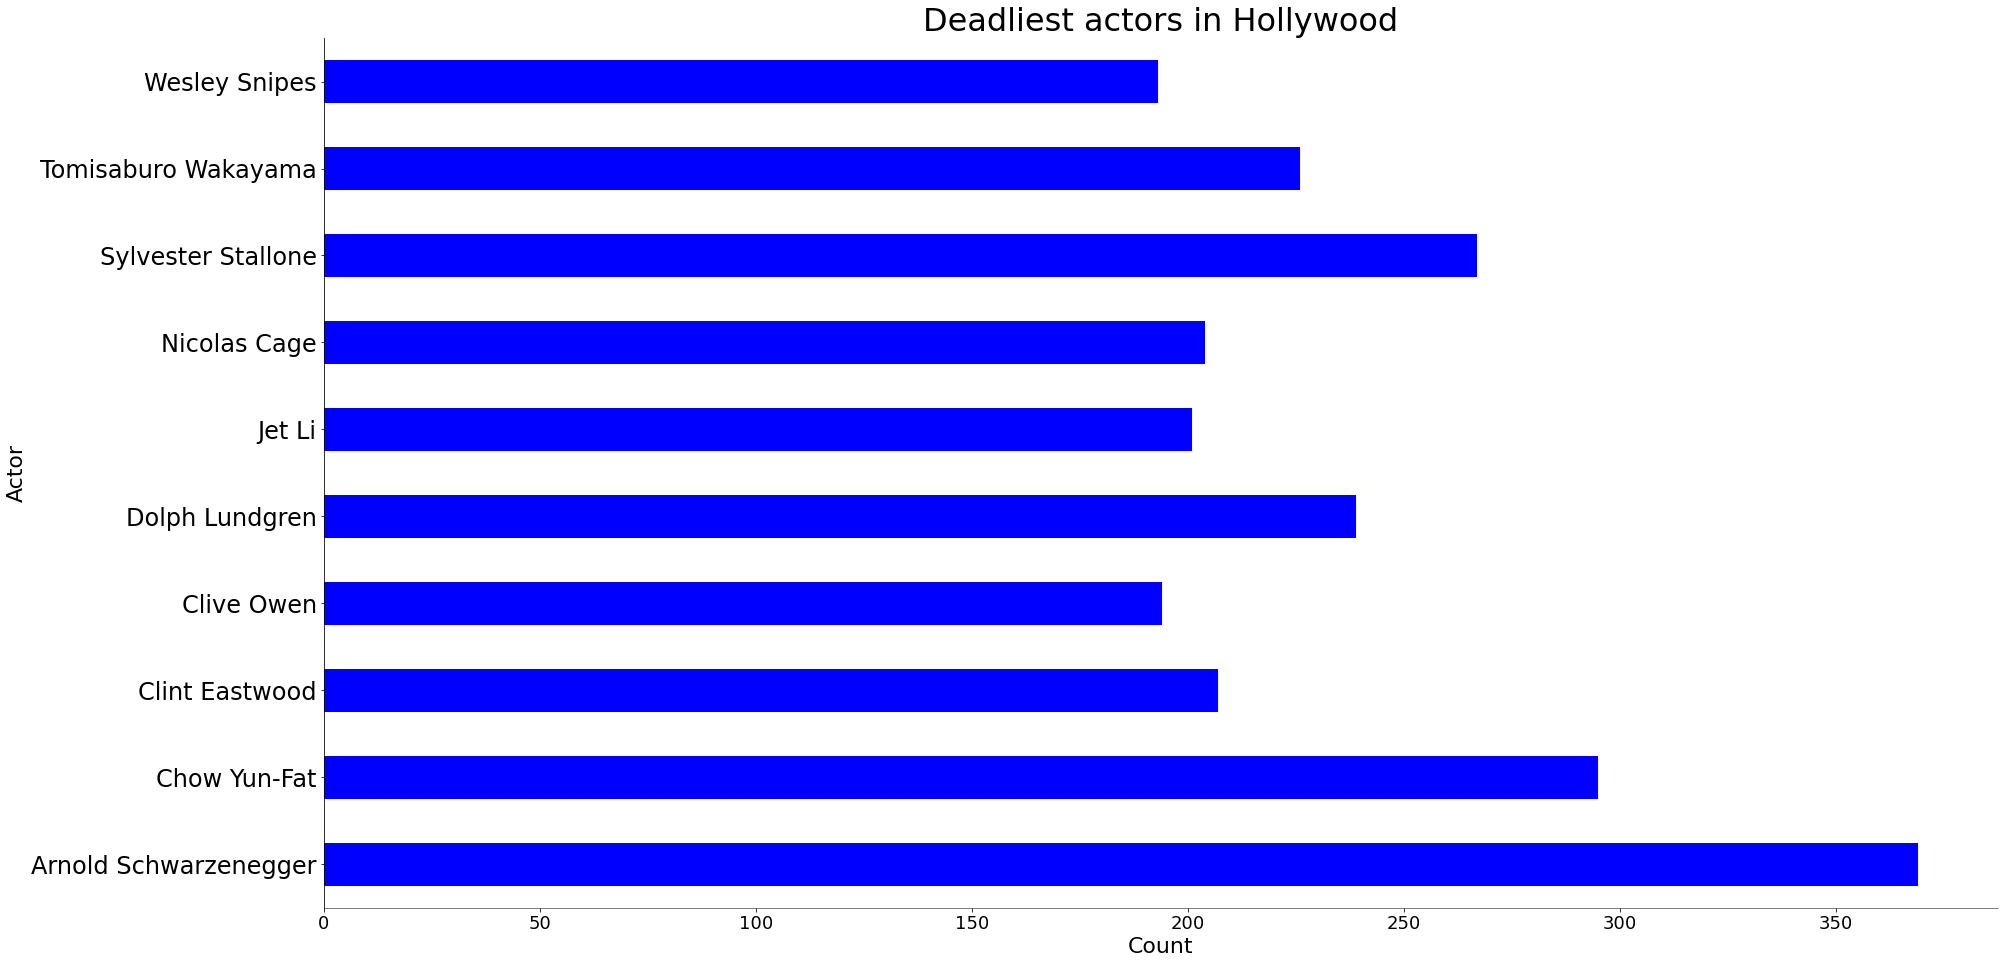

In [57]:
act2 = act[['Actor', 'Count']].sort_values(by = 'Count', ascending = True)
act.set_index('Actor', inplace = True)
## A modified horizontal bar graph
barh = act.plot(kind='barh',figsize=(30, 16), color = "blue", legend = None)
barh
plt.yticks(fontsize = 24)
plt.xticks(fontsize = 18)
plt.xlabel("Count", fontsize = 22)
plt.ylabel("Actor", fontsize = 22)
plt.title("Deadliest actors in Hollywood", fontsize=32)
barh.spines['top'].set_visible(False)
barh.spines['right'].set_visible(False)
barh.spines['bottom'].set_linewidth(0.5)
barh.spines['left'].set_visible(True)
plt.show()

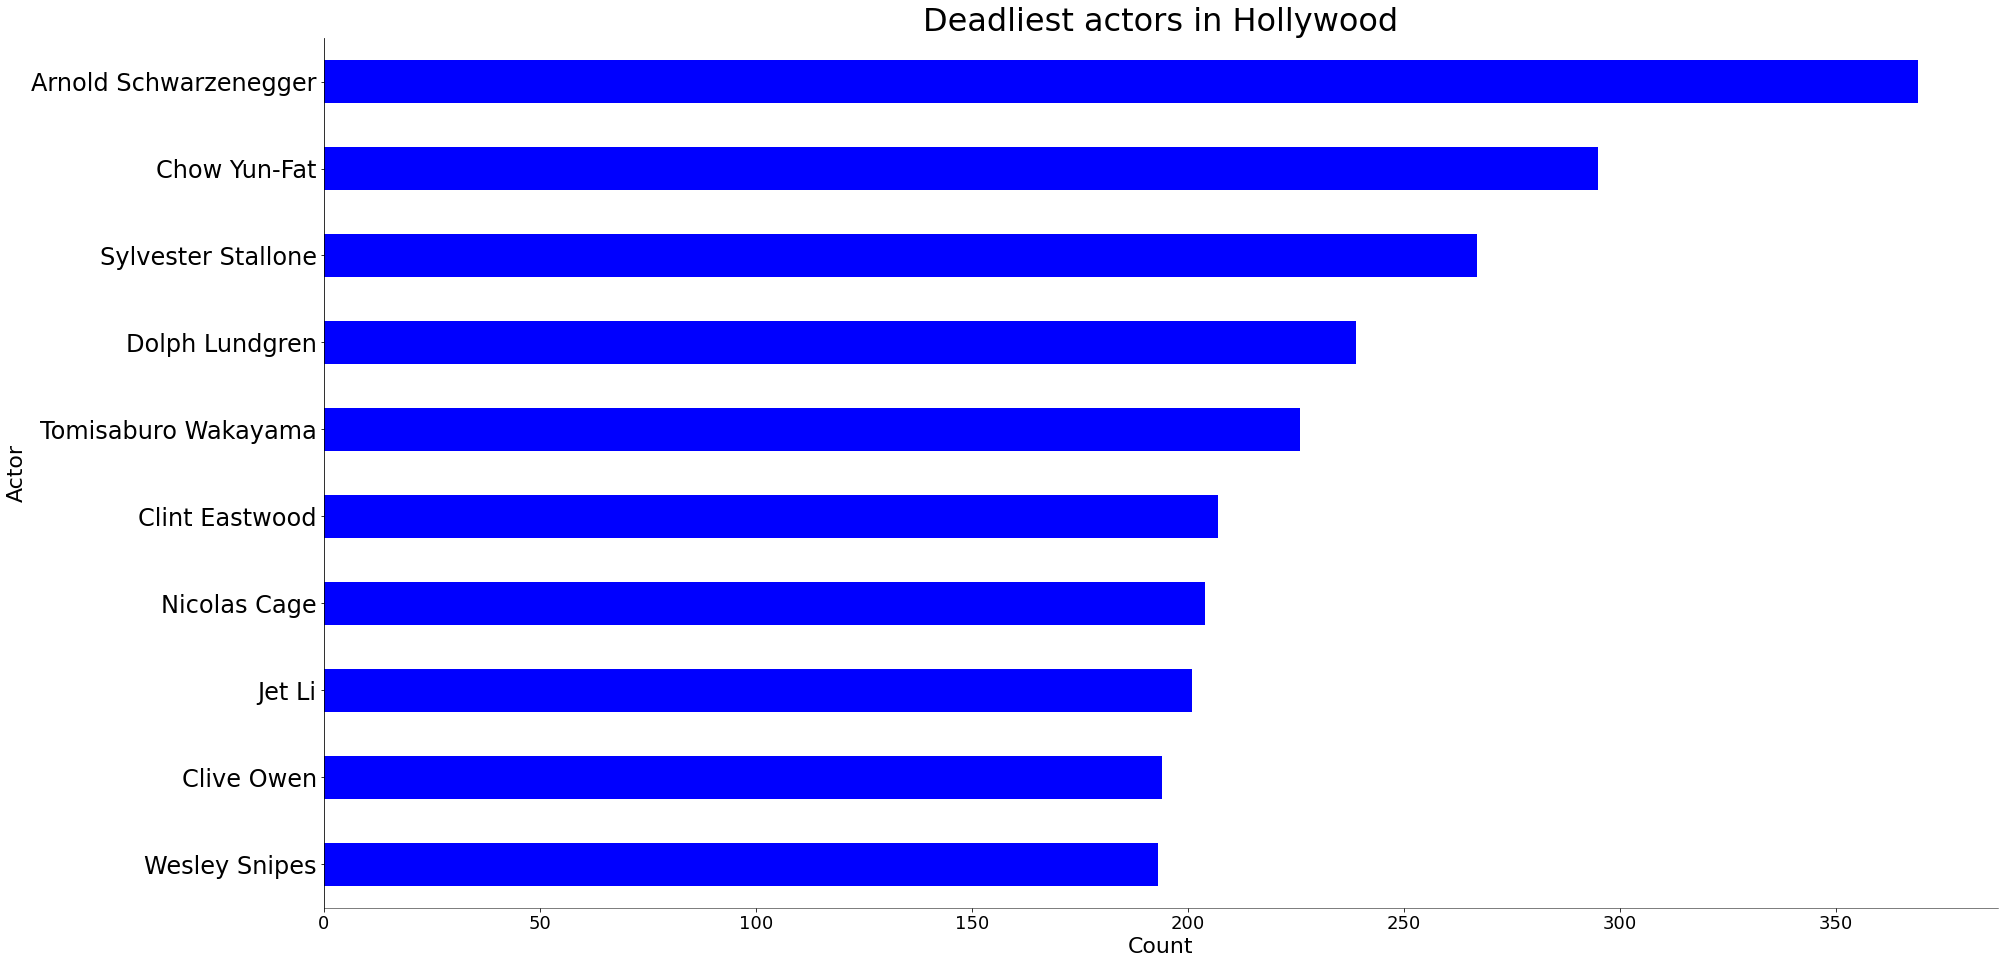

In [61]:
#Sort by Killed count

act.set_index('Actor', inplace = True)
act.sort_values('Count',inplace=True)
## A modified horizontal bar graph
barh = act.plot(kind='barh',figsize=(30, 16), color = "blue", legend = None)
barh
plt.yticks(fontsize = 24)
plt.xticks(fontsize = 18)
plt.xlabel("Count", fontsize = 22)
plt.ylabel("Actor", fontsize = 22)
plt.title("Deadliest actors in Hollywood", fontsize=32)
barh.spines['top'].set_visible(False)
barh.spines['right'].set_visible(False)
barh.spines['bottom'].set_linewidth(0.5)
barh.spines['left'].set_visible(True)
plt.show()

Q9 Create a pie chart showing the fraction of all Roman Emperors that were assassinated.

In [62]:
#Download dataset for analysis
roman = pd.read_csv(r'C:\Users\PP\Desktop\Geo\1004\roman.csv')
roman

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


In [63]:
#Solution 1

pie1 = roman.Cause_of_Death
pie_cause = roman.groupby('Cause_of_Death').agg('count')
cause_labels = pie_cause.Emperor.sort_values().index
pie1_list = pie_cause.Emperor.sort_values()
# figure
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": cause_labels,
      "domain": {"x": [.2, .5]},
      "name": "% Of Died",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Assassianted fraction of all Roman Emperors",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Cause of Died",
                "x": 0.20,
                "y": 1
            
             
            },
        ]
    }
}
iplot(fig)

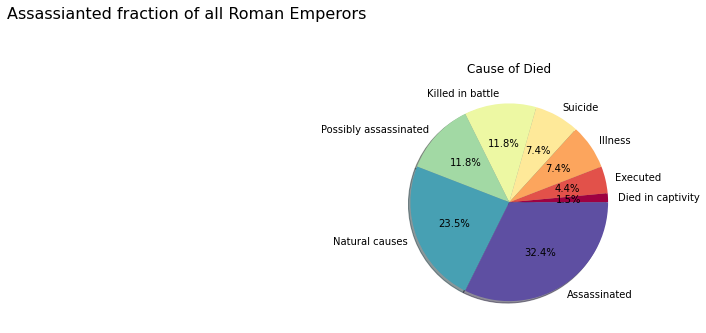

In [64]:
#Solution 2

pie_cause = roman.groupby('Cause_of_Death').agg('count')
from matplotlib.gridspec import GridSpec

cause_labels = pie_cause.Emperor.sort_values().index
cause_counts = pie_cause.Emperor.sort_values()

# Make square figures and axes
# GridSpec:Specifies the geometry of the grid that a subplot will be placed
plt.figure(1, figsize=(20,10))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]


plt.subplot(the_grid[0, 1], aspect=1, title='Cause of Died')

#autopct show precentage
course_pie = plt.pie(cause_counts, labels=cause_labels, autopct='%1.1f%%', shadow=True, colors=colors)

plt.suptitle('Assassianted fraction of all Roman Emperors', fontsize=16)

plt.show()

Q10 Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.

In [65]:
#Download dataset for analysis
arcade = pd.read_csv(r'C:\Users\PP\Desktop\Geo\1004\arcade.csv')
arcade

,Year,Revenue,Awarded
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


In [66]:
# import graph objects as "go"
import plotly.graph_objs as go
# creating trace1
trace1 =go.Scatter(
                    x = arcade.Year,
                    y = arcade.Revenue,
                    mode = "markers",
                    name = "Revenue",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= arcade.Revenue)
# creating trace2
trace2 =go.Scatter(
                    x = arcade.Year,
                    y = arcade.Awarded,
                    mode = "markers",
                    name = "Awarded",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= arcade.Awarded)

data = [trace1,trace2]
layout = dict(title = 'Relationship between the Total revenue and CS PhDs awarded in the U.S.between 2000 to 2009',
              xaxis= dict(title= 'Year',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Number',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [67]:
# prepare data frames
ar2000 = arcade[arcade.Year == 2000].iloc[:100,:]
ar2009 = arcade[arcade.Year == 2009].iloc[:100,:]

# import graph objects as "go"
import plotly.graph_objs as go
# creating trace1
trace1 =go.Scatter(
                    x = ar2000.Revenue,
                    y = ar2000.Awarded,
                    mode = "markers",
                    name = "2000",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= ar2000.Year)
# creating trace2
trace2 =go.Scatter(
                    x = ar2009.Revenue,
                    y = ar2009.Awarded,
                    mode = "markers",
                    name = "2009",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= ar2009.Year)

data = [trace1, trace2]
layout = dict(title = 'Relationship between the Total revenue and CS PhDs awarded in the U.S.between 2000 and 2009',
              xaxis= dict(title= 'Total Arcade Revenue',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Computer Science Doctorates Awarded',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)